## Missing Values

1. Value not known
2. Very common in real world

Solutions 
   - Delete missing values/columns
   - Add default values (Imputation)
   
Technique for Default Values (Imputation)
    - Replace missing value with mean value
 

## Using Mean as default values

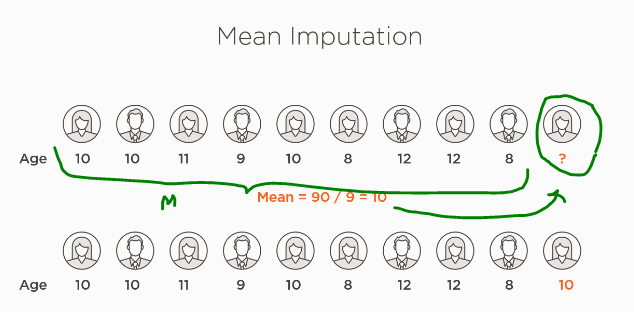

## Mean affected by extreme values we can use median (middle number) for default values


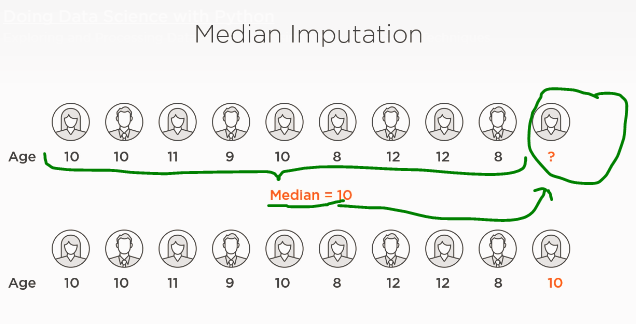


## Default values for categorical values 

In titanic data set class can be 1,2,3 where 1 = 1st class and 3 = lowest class

Mode = Most used class 

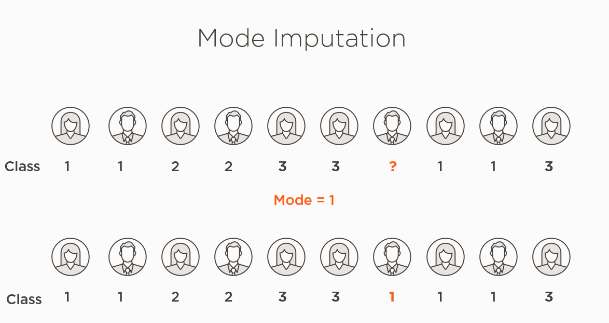

In [16]:
import pandas as pd
import numpy as np

train_df= pd.read_csv(train_file_path,index_col="PassengerId")
test_df = pd.read_csv(test_file_path,index_col="PassengerId")

#print(train_df.describe())
# missing Survived column!
#print(test_df.describe())

test_df["Survived"] = -888

df = pd.concat((train_df,test_df),axis=0)

# allows us to see missing values
print(df.info())

# missing values columns Age, Cabin, Embarked, Fare, 

# Embarked values
df[df["Embarked"].isnull()]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB
None


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [19]:
# how many people embarked from different points
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [21]:
pd.crosstab(df[df.Survived != -888].Survived,df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [51]:
survived = df.loc[((df.Survived != -888) & (df.Survived.notnull()))]
survived_class = survived.loc[survived.Pclass.notnull()]
pd.crosstab(survived.Survived,survived_class.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


## Set Missing values
inplace means data frame will be changed
df.Embarked.fillna('S',inplace=True)

In [107]:
# based on fare and class we can find the embarkment point
df.groupby(["Pclass","Embarked"]).Fare.median()

df.Embarked.fillna("C",inplace=True)

df[df.Embarked.isnull()]

#df.info()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [120]:
# missing values for fare fill with default values
df.loc[((df.Fare.isnull()))]
# passengerId 1044 embarked from S and class is 3
df.groupby(["Pclass","Embarked"]).Fare.median()

median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == "S"),"Fare"].median()

print(median_fare)

df.Fare.fillna(median_fare,inplace=True)

df.info()

8.05
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB
